In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Theory

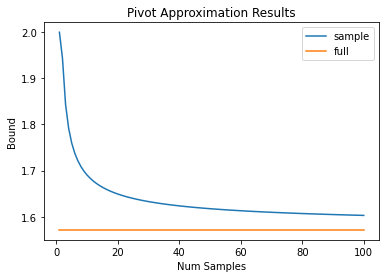

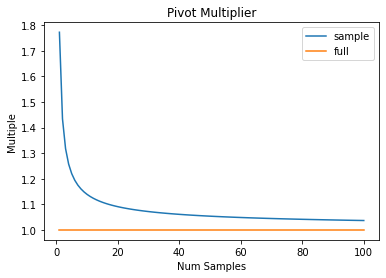

1.433752185434345 1.1387778947159655


In [34]:
### ------------------------- ###
### --- NORMAL APPROX ------- ###
### ------------------------- ###

# for analyzing limited representatives in hybrid
def normal_bound2(R, p):
    numerator = np.sqrt(R) * (0.5 - p)
    denominator = np.sqrt(p * (1 - p))
    return numerator / denominator

def compute_maximum2(R):
    # find value of p that produces maximum multiple
    # and report the multiple
    max_p = 0
    max_result = 0
    for i in range(499, 0, -1):
        p = i / 1000
        error = 1 - norm.cdf(normal_bound2(R, p))
        new_value = (p * (1 - error) + (1-p) * error) / p
        if new_value > max_result:
            max_result = new_value
            max_p = p
    return max_result, max_p

def approximation_bound(multiple):
    return min(2, (6 * multiple + 5)/7)

MAX = 100
x = [i for i in range(1, MAX + 1)]
y = [approximation_bound(compute_maximum2(R)[0]) for R in x]

constant = [11/7 for i in x]

plt.title("Pivot Approximation Results")
plt.xlabel("Num Samples")
plt.ylabel("Bound")
plt.plot(x, y, label="sample")
plt.plot(x, constant, label="full")
plt.legend()
plt.show()

multiple = [compute_maximum2(R)[0] for R in x]
constant = [1 for i in x]

plt.title("Pivot Multiplier")
plt.xlabel("Num Samples")
plt.ylabel("Multiple")
plt.plot(x, multiple, label="sample")
plt.plot(x, constant, label="full")
plt.legend()
plt.show()

In [36]:
print(compute_maximum2(2)[0], compute_maximum2(10)[0], compute_maximum2(50)[0], compute_maximum2(100)[0])

attributes = [x for x in range(50, 1001, 50)]
results = []
for x in attributes:
    results.append(compute_maximum2(x)[0])
print(results)

1.433752185434345 1.1387778947159655 1.0536727619880182 1.036714952423889
[1.0536727619880182, 1.036714952423889, 1.029551559287961, 1.0253695894375048, 1.0225588199624884, 1.020506860031704, 1.018922297103657, 1.0176540535584482, 1.0166095016616181, 1.0157270951490565, 1.0149666875656815, 1.0143107525947137, 1.0137367229298642, 1.013211628380876, 1.0127617409404073, 1.01233506955035, 1.0119664953245213, 1.0116181996026026, 1.011295115424985, 1.0110103362703242]


### FB: Government

Pivot multiple increase of cost for smallest sample: 1.0375310491513505


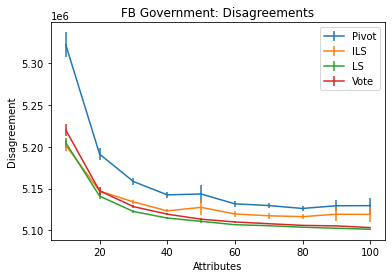

[1.03753, 1.01201, 1.00563, 1.00252, 1.00272, 1.00043, 1.00003, 0.99934, 0.99998, 1.0]
[1.01408, 1.0034, 1.00089, 0.99878, 0.9996, 0.99806, 0.99763, 0.99744, 0.998, 0.99796]
[1.01467, 1.00222, 0.99864, 0.99711, 0.99634, 0.99556, 0.99532, 0.99497, 0.99473, 0.99449]
[1.01764, 1.00345, 0.99978, 0.99801, 0.99684, 0.9962, 0.99579, 0.9954, 0.99528, 0.99488]


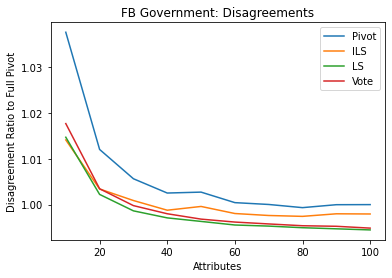

In [31]:
"""
Score Plots (Disagreement to Input Clusterings): 
"""

attributes = [x for x in range(10, 101, 10)]

### PIVOT ###

scores1 = [[5343381,5314723,5339393,5303991,5313907,5303121,5336071,5307789,5338829,5320079],
[5203499,5196499,5192067,5193001,5197029,5187133,5198023,5181601,5178867,5184607],
[5154667,5160397,5157025,5165995,5154621,5154089,5155993,5164891,5161209,5155837],
[5144487,5139235,5139167,5146607,5149131,5144285,5136695,5145783,5140407,5139327],
[5169095,5139469,5137045,5150641,5133567,5138551,5136759,5150619,5130123,5149945],
[5133633,5131011,5136827,5129717,5140229,5127317,5129341,5127289,5131273,5131405],
[5125943,5130775,5125733,5132123,5134895,5127409,5131883,5132279,5129363,5126971],
[5125455,5126575,5126845,5119669,5128675,5130061,5125431,5130107,5124949,5124601],
[5124149,5127625,5128281,5130451,5122803,5127235,5124225,5147079,5127037,5136161],
[5122753,5126943,5124911,5133347,5123057,5155201,5135071,5126299,5126097,5122409]]

### ILS ###

h_scores1 = [[5213499,5199029,5206085,5195823,5197823,5196521,5198433,5193909,5209941,5207075],
[5150459,5150333,5143051,5148983,5148557,5149673,5151117,5141923,5145811,5140629],
[5130931,5133075,5132677,5139175,5134837,5136777,5134527,5134013,5131833,5133817],
[5125617,5121879,5120729,5123079,5126413,5122649,5122147,5124543,5122565,5123999],
[5149683,5124959,5118999,5134701,5121359,5120417,5121887,5133177,5119431,5131175],
[5119997,5117379,5123331,5116327,5129327,5118415,5117335,5114645,5121275,5118705],
[5112799,5120511,5114411,5122499,5120779,5115277,5121399,5116203,5115681,5115213],
[5115767,5116443,5116075,5111995,5117961,5121209,5116263,5120663,5113919,5114389],
[5113917,5116665,5116505,5121883,5114345,5115871,5113419,5138517,5115265,5126903],
[5113087,5118595,5113081,5121487,5111749,5144355,5123703,5117103,5115749,5112619]]

### LOCAL ###

h_scores2 = [[5210003,5196791,5209825,5200565,5201061,5204757,5210187,5194113,5209375,5212095],
[5146703,5141489,5143905,5138583,5146131,5140011,5139109,5138343,5137695,5138213],
[5124425,5124263,5120241,5126321,5120321,5122631,5121979,5121691,5123225,5121355],
[5113863,5115365,5115623,5113227,5115441,5114645,5115337,5113727,5115833,5114697],
[5114717,5110001,5108643,5109945,5109533,5111993,5110303,5112437,5108665,5112093],
[5106763,5106379,5105677,5107423,5107383,5106179,5105995,5107035,5108595,5106751],
[5105447,5106411,5105699,5106033,5106565,5105879,5105641,5104333,5105287,5104773],
[5102683,5103205,5104187,5104297,5104623,5104303,5103725,5104289,5102851,5103989],
[5102469,5102895,5102993,5101783,5101913,5103717,5102253,5101227,5103131,5103571],
[5100549,5100955,5102359,5100815,5100259,5101773,5102471,5102093,5100641,5101451]]

### VOTE ### 

l_scores1 = [[5230869,5212847,5232777,5214005,5216367,5211773,5225819,5212669,5219769,5224175],
[5155735,5147149,5151611,5143703,5154181,5141905,5146203,5141803,5146779,5143893],
[5129457,5128479,5127499,5132073,5125597,5128075,5127011,5129071,5129645,5128071],
[5120611,5122727,5119241,5117531,5120635,5118851,5118325,5118625,5119543,5118069],
[5113831,5113995,5111029,5113385,5113063,5114629,5113727,5113721,5111833,5114883],
[5111511,5111031,5110819,5110681,5109659,5108933,5109855,5109479,5109669,5109527],
[5108155,5107223,5108105,5109587,5108171,5108133,5107245,5106469,5108295,5108573],
[5106655,5105537,5106647,5106393,5106557,5105623,5105773,5106251,5105287,5105381],
[5104717,5105615,5106457,5105137,5105485,5105139,5105127,5105765,5105921,5104411],
[5103369,5103369,5103369,5103369,5103369,5103369,5103369,5103369,5103369,5103369]]

scores = [scores1[i] for i in range(len(attributes))]
plot_scores = [np.mean(s) for s in scores]
err_scores = [np.std(s) for s in scores]

print("Pivot multiple increase of cost for smallest sample:", plot_scores[0] / plot_scores[-1])

h_scores = [h_scores1[i] for i in range(len(attributes))]
h_plot_scores = [np.mean(s) for s in h_scores]
h_err_scores = [np.std(s) for s in h_scores]

h1_scores = [h_scores2[i] for i in range(len(attributes))]
h1_plot_scores = [np.mean(s) for s in h1_scores]
h1_err_scores = [np.std(s) for s in h1_scores]

l_scores = [l_scores1[i] for i in range(len(attributes))]
l_plot_scores = [np.mean(s) for s in l_scores]
l_err_scores = [np.std(s) for s in l_scores]

# print("LS relative decrease from ILS at R = 100:", 100 * (h1_plot_scores[-1] - l_plot_scores[-1] ) / h1_plot_scores[-1])


plt.title("FB Government: Disagreements")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores, label="Pivot")
plt.errorbar(attributes, h_plot_scores, h_err_scores, label="ILS")
plt.errorbar(attributes, h1_plot_scores, h1_err_scores, label="LS")
plt.errorbar(attributes, l_plot_scores, l_err_scores, label="Vote")
plt.legend()
plt.show()


"""
# Percent Decrease relative to Pivot at current attribute level
h_scores = [[100 * (scores1[i][j] - h_scores1[i][j]) / scores1[i][j] for j in range(len(scores1[i]))] for i in range(len(attributes))]
h_plot_scores = [np.mean(s) for s in h_scores]
h_err_scores = [np.std(s) for s in h_scores]

h1_scores = [[100 * (scores1[i][j] - h_scores2[i][j]) / scores1[i][j] for j in range(len(scores1[i]))] for i in range(len(attributes))]
h1_plot_scores = [np.mean(s) for s in h1_scores]
h1_err_scores = [np.std(s) for s in h1_scores]

l_scores = [[100 * (scores1[i][j] - l_scores1[i][j]) / scores1[i][j] for j in range(len(scores1[i]))] for i in range(len(attributes))]
l_plot_scores = [np.mean(s) for s in l_scores]
l_err_scores = [np.std(s) for s in l_scores]

plt.title("FB Government: Disagreements")
plt.xlabel("Attributes")
plt.ylabel("% Disagreement Improvement")
# plt.errorbar(attributes, plot_scores, err_scores, label="Pivot")
plt.errorbar(attributes, h_plot_scores, h_err_scores, label="ILS")
plt.errorbar(attributes, h1_plot_scores, h1_err_scores, label="LS")
plt.errorbar(attributes, l_plot_scores, l_err_scores, label="Vote")
plt.legend()
plt.show()
"""

"""
# Percent increase relative to Pivot at full attributes

pivot_change = [100 * (plot_scores[i] - plot_scores[-1]) / plot_scores[i] for i in range(len(attributes))]
ils_change = [100 * (h_plot_scores[i] - plot_scores[-1]) / h_plot_scores[i] for i in range(len(attributes))]
ls_change = [100 * (h1_plot_scores[i] - plot_scores[-1]) / h1_plot_scores[i] for i in range(len(attributes))]
vote_change = [100 * (l_plot_scores[i] - plot_scores[-1]) / l_plot_scores[i] for i in range(len(attributes))]

plt.title("FB Government: Disagreements")
plt.xlabel("Attributes")
plt.ylabel("% Disagreement Increase Relative to Full Pivot")
plt.plot(attributes, pivot_change, label="Pivot")
plt.plot(attributes, ils_change, label="ILS")
plt.plot(attributes, ls_change, label="LS")
plt.plot(attributes, vote_change, label="Vote")
plt.legend()
plt.show()
"""

# Multiples of relative improvement to Pivot at full attributes

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
ils_change = [round(h_plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
ls_change = [round(h1_plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
vote_change = [round(l_plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]

print(pivot_change)
print(ils_change)
print(ls_change)
print(vote_change)

plt.title("FB Government: Disagreements")
plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change, label="Pivot")
plt.plot(attributes, ils_change, label="ILS")
plt.plot(attributes, ls_change, label="LS")
plt.plot(attributes, vote_change, label="Vote")
plt.legend()
plt.show()



[3.8729, 10.0685, 17.7595, 30.9566, 46.0189, 59.1831, 88.1063, 110.4715, 122.44, 144.8507]
[4.0507, 10.1879, 17.8666, 31.0574, 46.1145, 59.2742, 88.2024, 110.5662, 122.5317, 144.9502]
[20.2513, 46.148, 86.5387, 156.5385, 235.8922, 296.2294, 420.7141, 510.1167, 543.7327, 629.3509]
[7.6047, 14.3278, 23.253, 37.437, 56.2808, 70.0287, 94.7114, 114.0698, 127.1253, 141.0113]


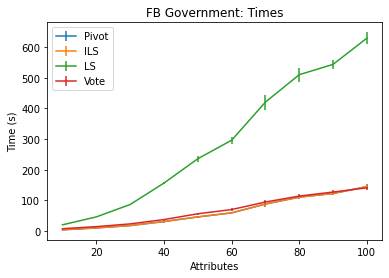

In [32]:
"""
Time Plots: 
"""

attributes = [x for x in range(10, 101, 10)]

### PIVOT ### 

scores1 = [[4.517,4.041,3.674,3.74,3.817,4.028,3.902,3.709,3.607,3.694],
[9.756,10.271,10.119,10.331,9.904,10.044,10.132,10.053,9.845,10.23],
[17.848,17.036,18.288,18.91,17.775,17.581,18.139,17.458,16.764,17.796],
[30.395,29.16,28.92,40.66,28.031,30.375,32.784,29.266,29.708,30.267],
[44.865,46.152,52.318,44.002,50.899,45.361,44.287,43.214,46.37,42.721],
[57.963,60.622,60.334,62.812,60.469,57.899,57.316,59.208,58.564,56.644],
[77.114,80.492,84.999,118.953,92.253,82.162,86.517,81.57,87.598,89.405],
[107.506,109.366,106.001,110.394,117.857,115.471,114.216,108.96,113.184,101.76],
[120.428,126.689,124.75,120.96,119.717,130.428,127.677,118.395,115.961,119.395],
[142.14,142.989,144.044,140.754,163.841,148.61,147.932,144.88,134.537,138.78]]

### HYBRID ###

h_scores1 = [[0.283,0.164,0.17,0.178,0.162,0.165,0.167,0.163,0.167,0.159],
[0.115,0.12,0.124,0.121,0.122,0.114,0.128,0.112,0.119,0.119],
[0.102,0.105,0.108,0.116,0.105,0.107,0.111,0.103,0.108,0.106],
[0.1,0.099,0.097,0.098,0.102,0.105,0.101,0.104,0.101,0.101],
[0.099,0.095,0.095,0.1,0.094,0.094,0.099,0.092,0.095,0.093],
[0.088,0.096,0.087,0.093,0.095,0.087,0.095,0.092,0.093,0.085],
[0.089,0.085,0.092,0.1,0.097,0.108,0.099,0.09,0.094,0.107],
[0.093,0.092,0.098,0.095,0.098,0.098,0.096,0.092,0.097,0.088],
[0.089,0.093,0.095,0.092,0.091,0.092,0.097,0.089,0.092,0.087],
[0.091,0.092,0.133,0.091,0.139,0.088,0.09,0.089,0.089,0.093]]

# Add in Pivot Times
h_scores1 = [[h_scores1[i][j] + scores1[i][j] for j in range(len(h_scores1[i]))] for i in range(len(h_scores1))]

### LOCAL ###

h_scores2 = [[17.297,16.573,16.006,16.39,16.669,16.638,16.111,16.052,16.019,16.029],
[35.054,36.554,36.658,36.013,35.27,36.043,36.808,35.266,35.193,37.936],
[70.449,65.883,69.2,73.477,69.841,65.397,69.034,68.393,68.646,67.472],
[128.042,125.87,121.487,126.139,126.359,125.019,125.541,127.36,126.434,123.568],
[206.805,191.904,191.221,193.161,189.061,189.77,195.564,184.266,183.128,173.853],
[241.947,233.544,227.778,238.267,242.593,246.081,231.277,224.64,260.86,223.476],
[316.678,325.284,345.814,359.51,335.91,300.895,335.536,336.173,335.88,334.398],
[391.223,407.065,417.93,413.73,429.398,418.385,398.475,384.07,365.28,370.896],
[419.29,433.014,417.554,404.314,453.168,432.033,413.82,410.612,415.119,414.003],
[488.399,485.921,480.219,470.904,461.11,509.088,513.762,477.054,458.206,500.339]]

# Add in Pivot Times
h_scores2 = [[h_scores2[i][j] + scores1[i][j] for j in range(len(h_scores2[i]))] for i in range(len(h_scores2))]

### VOTE ### 

l_scores1 = [[7.847,7.676,7.454,7.804,7.567,7.762,7.514,7.493,7.467,7.463],
[14.112,14.725,14.549,14.288,13.843,14.506,14.339,14.07,14.068,14.778],
[22.494,23.388,23.776,23.353,22.426,22.683,23.776,23.874,23.22,23.54],
[37.352,37.278,39.06,39.066,37.083,35.826,35.956,38.418,38.391,35.94],
[61.075,56.931,58.112,61.083,54.795,52.581,56.691,57.155,53.112,51.273],
[69.91,75.93,78.051,72.111,73.231,65.633,68.225,65.856,65.279,66.061],
[87.076,93.702,107.383,99.844,87.686,93.747,94.676,96.825,86.981,99.194],
[120.439,111.873,124.866,120.309,120.945,117.204,112.489,106.072,104.466,102.035],
[130.862,137.481,121.982,119.197,139.223,129.122,120.131,119.004,133.791,120.46],
[141.579,143.805,141.885,142.043,136.66,150.884,142.625,130.924,133.174,146.534]]

scores = [scores1[i] for i in range(len(attributes))]
plot_scores = [round(np.mean(s), 5) for s in scores]
err_scores = [np.std(s) for s in scores]

h_scores = [h_scores1[i] for i in range(len(attributes))]
h_plot_scores = [round(np.mean(s), 5) for s in h_scores]
h_err_scores = [np.std(s) for s in h_scores]

h1_scores = [h_scores2[i] for i in range(len(attributes))]
h1_plot_scores = [round(np.mean(s), 5) for s in h1_scores]
h1_err_scores = [np.std(s) for s in h1_scores]

l_scores = [l_scores1[i] for i in range(len(attributes))]
l_plot_scores = [round(np.mean(s), 5) for s in l_scores]
l_err_scores = [np.std(s) for s in l_scores]

print(plot_scores)
print(h_plot_scores)
print(h1_plot_scores)
print(l_plot_scores)

plt.title("FB Government: Times")
plt.xlabel("Attributes")
plt.ylabel("Time (s)")
plt.errorbar(attributes, plot_scores, err_scores, label="Pivot")
plt.errorbar(attributes, h_plot_scores, h_err_scores, label="ILS")
plt.errorbar(attributes, h1_plot_scores, h1_err_scores, label="LS")
plt.errorbar(attributes, l_plot_scores, l_err_scores, label="Vote")
plt.legend()
plt.show()


### Mushrooms

Pivot multiple increase of cost for smallest sample: 1.1310723007480177
LS relative decrease from ILS at R = 22: 0.6663595284650332


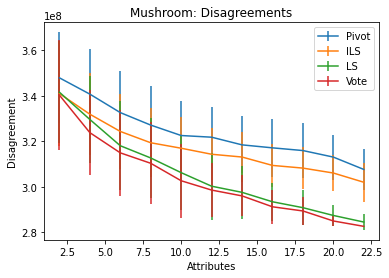

[1.13107, 1.10774, 1.08132, 1.06344, 1.04852, 1.04613, 1.03515, 1.03088, 1.02701, 1.01765, 1.0]
[1.10855, 1.07902, 1.05435, 1.03815, 1.03034, 1.02172, 1.01774, 1.00574, 1.0019, 0.99487, 0.98165]
[1.11048, 1.07149, 1.0339, 1.0164, 0.99539, 0.97601, 0.96722, 0.95372, 0.94528, 0.93414, 0.92472]
[1.10628, 1.05262, 1.02372, 1.00879, 0.98379, 0.97046, 0.96212, 0.94654, 0.94057, 0.92625, 0.91856]


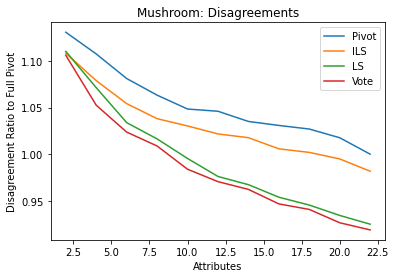

In [27]:
"""
Score Plots (Disagreement to Input Clusterings): 
"""

attributes = [x for x in range(2, 23, 2)]

scores1 = [[339273584,367101552,375925360,324704576,367101552,366522432,329971424,375925360,329443844,317119808,324851392,337349216,329463392,335605888,336616192,347988112,331484000,345265704,365871588,369787088,324668864,313905788,325535168,326018816,319599648,366651744,370034084,375925360,325385744,370712768,356908608,374643556,375925360,354339632,365871588,372604336,351700848,375925360,329276656,340190280,366522432,327124608,330303760,332407520,354640304,334477874,375925360,368931448,336616192,337401248],
           [324190320,331047686,341983040,326401208,354462624,334025232,375925360,367101552,375077032,334061432,366535168,332535248,336636928,316436280,348272740,331845020,354211588,356335632,326940680,298772568,336568096,319119936,319939904,341659000,361543538,362569776,330510408,357817824,369911808,335250176,332834044,327769960,359362096,330116048,375925360,334032616,315681920,340921808,372713584,325850632,318715232,358845228,310600064,361125056,335390136,315040320,331347440,314550664,373628512,336508752],
           [327199024,354818644,314085602,324449664,320215988,326729648,322093642,354270804,316062352,319604784,333464368,334199168,325303596,340956028,375333504,320501892,315395376,340652932,367833076,325813416,329282368,293160960,373628512,333236944,313919012,333163392,334844640,356613688,340873888,333121728,330757488,315614474,316564124,341951988,355941152,302382124,331062802,331034144,350713792,369515860,333817216,361652096,311314240,318181244,325488504,312334720,314624160,352726152,334898912,320948672],
           [335164840,336446096,305974260,303763024,293341928,316329324,334992664,329568136,359779260,362938000,319782384,322185452,299400032,322922164,328750048,333679172,357702932,303143344,309811856,337963460,315709216,312271344,365423676,312205258,344142512,331738424,344251024,326228576,325580636,307602280,312664768,329027912,334180824,326313672,351136768,328732716,299476672,340595092,341131140,318183764,336345998,328334836,312856432,353869680,349778096,331373300,325755466,307939680,319233160,311528216],
           [338587144,329583876,308784220,324891992,308880108,311896234,355193420,308911604,330065742,367967860,315322688,323153390,324653244,329079674,316364450,315649714,338591248,320230192,311551608,312507800,328252680,323138316,305963120,355590328,307365630,350167372,322055456,318451704,334816486,316027292,295054160,332348104,330573424,311952656,322873820,308770280,319379652,312489952,307128536,329163912,338069376,319891532,330705380,305743432,353702264,325676516,320223220,308256828,299290868,302708474],
           [325945776,328819216,335423138,350013880,309305536,327814504,343786408,332315492,322820468,305323976,324697300,316872278,314691608,325569988,300929166,345139856,322010664,309084668,313585656,337776712,321586260,326204396,301782806,311823832,358019488,326417962,313282782,315591826,314976880,320484904,328027846,295718552,320693676,312267630,353904400,333097038,317138340,320394492,298354880,332565808,329869982,312167620,311299378,317447788,314200338,315367784,309603800,319394228,319561732,327789280],
           [315774792,327391196,313412592,334586206,298955430,317675184,348212832,317748106,310312412,304377992,314857696,322564100,311334344,315966344,319719032,336388930,299600240,316907810,305874846,320513074,326941116,307771906,306310436,334497132,307480444,337277040,325951836,298689660,306908720,313829328,316793116,337026296,321655056,331406430,308508828,321048704,305044870,325720398,342083884,341549576,319879452,324751920,296036520,323239100,335215984,298429500,320209992,315416882,312850664,307396348],
           [323159958,296079586,312763764,330115098,307120516,320387986,301610560,299541528,335894000,350329918,313008472,320457184,317412170,310874022,306929038,325821318,310366496,341761472,305959754,305724828,319424444,334598736,318498166,312081458,312095700,305244892,317010210,319652344,295604072,318465410,307788806,315395730,334831824,331889248,316229500,328624800,323362900,301325356,314244086,293229824,328660258,314951532,302187184,330518184,321835942,328070818,308519856,323791006,303470472,339572468],
           [317304752,309115852,305798394,301312376,317467162,313724066,299427834,302568518,305149024,317749388,304140726,314248136,324616910,308156458,330753930,321477704,327806720,311679102,338625384,339647296,331668114,312414160,329149158,316699460,305437298,317552452,319688126,324771812,311288136,327813812,307550224,338730050,295501394,311706712,328547638,298831382,301195968,334152548,298679700,331772824,311150032,308303366,322371000,326122064,326121232,301724732,324013766,294039294,317557460,311560644],
           [318575096,296123108,314082792,312661626,316280344,302551726,322209832,320147794,327083886,316499080,315012776,313833870,324416022,305081126,313554016,306624526,318524904,295084216,321759320,303818686,318233808,294895852,304292478,302524882,325927232,317274166,323448110,315256522,322932206,300672968,298526072,323889652,327685194,319253822,319649344,298163412,297340438,327310872,325419226,321306578,313910208,323017432,300072912,305291368,309439868,295708652,315660960,306210456,319450956,316267232],
           [306374774,305970128,313060542,310054156,311884398,331201294,300651672,291777844,307539070,291604188,301188982,316809078,311130346,311721264,318186538,296096984,299893430,302838668,319008958,309069554,314845168,312513178,298955928,296347652,311274332,311691620,316178708,304893578,311748894,310897720,316490020,297601878,296027750,296447742,292550094,306300246,312936832,313580242,317411424,296209656,316144732,326472894,296974612,302181600,294772144,312850236,321143782,305187430,305861426,308909856]]


### ILS ###

h_scores1 = [[318623312,366522432,375925360,314254704,365845668,366522432,327315520,375925360,327831044,307969584,319966112,326133056,329463392,314375128,334235568,346961768,305358944,335611512,365871588,359265984,320919600,313871452,315057728,313020704,314385472,366651744,365992068,375925360,324535648,366663200,345254064,364868748,375925360,314744528,365871588,346827696,346966288,375925360,323995888,332335640,366522432,318976992,325903360,324463360,316186048,333115842,375925360,366516268,334235568,335531328],
             [316097808,331007554,340989824,326372678,299446146,331444656,360125280,367101552,370384484,329013126,366535168,331408838,333728480,314126424,318672388,328466886,340994036,356335632,323632456,295590832,324502174,314432000,305607846,336498798,350616314,350329568,321782816,349154644,350182624,330304962,332000372,318136414,338019044,329260134,335331526,324046168,311708272,339742288,365701842,323308600,315546036,336170330,309319364,348232560,322204930,306639616,327228672,314535080,358390400,326454932],
             [310857196,341449432,302985862,315580232,317670408,321964614,313809830,317935880,306986772,312748608,332265408,324584048,323990920,330254180,366522432,312434320,314851192,334217268,351506190,323666920,325012730,292462784,364563838,331316608,313095468,328991808,327616330,354216528,331089448,323840056,321571358,312611948,310483804,341683060,355492992,296667980,322574978,325598512,327006722,354487836,326834432,341664972,303877886,313574614,318005884,306204304,305998582,332519118,311322560,320700224],
             [331319136,324057702,301644622,298210684,293316304,310047754,328845440,316491266,344408224,351026894,313976222,317259980,298103660,321094996,324611676,330234440,352762074,296339334,307200212,316349390,314186310,298875314,354378420,308879712,335852674,319954164,316801922,317791594,324846580,305451024,311810646,309372360,320316382,319324070,343166540,325019136,299347968,337264454,317297678,310837776,319057820,316544564,309521840,344198188,344156490,322988546,317624952,303583586,315354382,307197858],
             [337990328,319925744,308339892,321772140,307641132,306806248,350674572,302322540,315942138,361693692,311580536,309647666,318309320,315750426,313712284,312683554,315450288,308246794,310032570,306669844,322932400,318143366,303967814,339005664,306270010,340074502,310457712,313240786,331128728,314413240,293805576,325097760,317612528,309739844,316820710,306302984,311940688,308737290,302391074,328499896,335675296,318973704,323313748,305172404,349739228,318820138,315665898,308201064,295683186,301114212],
             [321527862,320322990,324597064,320494492,305435070,315538014,319827404,329534100,318187510,301094858,307364898,311421346,312156892,316216462,296689862,339354848,316566444,306113186,311660520,305995256,311214992,321539462,298635926,305807522,355651504,316840206,309391812,309604618,312960888,316407324,313630736,294209824,310335922,308951718,344222660,314162368,311198530,312089410,298019894,331428052,324857856,307291106,303759686,310672466,310068456,305143274,301903284,316893572,319058094,319571786],
             [307494086,319736904,312380938,328166642,296247906,310896172,348212832,313921156,309441594,302216588,314219742,322096926,308069480,313995634,315004952,329578124,293850540,312843004,300434644,315456864,308643996,306252420,298470008,321856658,307005868,332801898,316869900,294127080,305013452,312052260,315585718,321305678,315090000,325336704,304811242,314424510,300290928,321953956,329149956,330746550,313713808,320534136,294755292,318249894,320041040,294197292,317334114,309534522,306201814,303791850],
             [314895766,294144140,308096154,323384984,305597922,317050858,299445264,293998440,317307488,310599870,311519934,318924322,313960286,300160088,304521314,317742186,307121098,335269014,301564202,300730880,311819610,304885858,314830950,307601244,308057524,300967426,309647792,314969264,293761486,305419642,297164104,312665384,309691246,326605980,306839826,316128592,309104034,299372042,310643666,288108206,310512694,307181584,299238792,326095408,314639762,325328200,305161636,314473992,302482254,320342368],
             [302379294,302044486,300895792,292714554,307391442,310115918,297765056,300010410,300441716,312716406,301053114,310294164,321869638,306403978,326229178,317375618,322869928,306597908,318862514,316350272,325130666,304741270,318498918,311531190,300689920,303932412,304354130,314774488,308568106,317063788,298786796,316373890,293024466,304301248,326565118,295419028,300116716,318631358,296543366,311240148,299988442,305441154,314670102,322624182,300631640,297850968,305648166,293218956,316543316,309463606],
             [303932068,291567068,311142848,307715498,302157622,297856530,313685278,304698032,309033356,311535028,313541076,304938990,306677226,297648548,301560832,303325548,315439148,290062404,302917536,301511796,317596254,293896284,299309706,300234628,312037600,314060354,318707710,313715012,320758888,296262050,296959714,310613068,307387016,305265498,312893304,295310130,292942968,319628886,313430542,313622226,311669904,316545452,297910462,299861610,301202050,292837142,311114154,302031776,310255472,313509278],
             [299747200,300925130,310572856,303673174,309216406,326430248,294707122,288218146,302456650,289229358,295653420,303745898,302972672,306134116,315066536,292026400,295210152,299202838,311391264,297944770,308714398,304569498,292551554,291363534,308279618,300554784,312873182,295398896,309117736,308432390,311887058,294137720,291487614,294018424,289449332,301436542,308548690,298571454,312064918,295170596,305838750,321500320,291770344,297670182,289630922,299432496,311428642,302930780,300772636,305142708]]

### LOCAL ###

h_scores2 = [[316338276,366522432,375925360,313186112,365871588,366522432,329148752,375925360,329443844,307969584,317274848,329731712,329463392,319718968,334235568,347061936,315603760,334804884,365871588,359031072,319858320,313905788,325535168,315136896,312161792,366651744,365871588,375925360,325160320,366663200,344989840,364894668,375925360,314744528,365871588,347061936,346644112,375925360,327632176,332200840,366522432,318287216,328693408,324463360,316186048,332085448,375925360,366539332,334235568,335532192],
             [316101040,331047686,341027456,326401208,293139476,323131790,360125280,367101552,370374434,329132978,366535168,328503134,333384116,304250348,319289814,326820622,338969396,356335632,321683740,296213846,323218688,314824026,309005188,337048852,350434920,350180160,316172478,349217396,350123838,318860192,318087412,318079444,338531664,326861494,333916774,323405294,311643936,339842704,365425184,323596604,317443900,321952814,296299096,347771008,310720798,303843206,327253088,314161270,358469760,315177940],
             [296460918,342088638,296451126,298450852,300236810,316084642,301866262,311828530,305959830,304011566,318140228,322000568,317711206,329076166,366522432,309431406,296816902,333289276,350030890,317212286,321530292,292695872,364538800,324788576,304771570,333163392,327613332,354191616,325117814,301784296,318058616,305746116,308916248,324085720,355492992,289683738,322615092,326951876,327254034,354038078,315592134,341576936,300557490,303337994,292626124,293415382,302648376,324338460,293400702,318683354],
             [313715962,308498218,287183038,297711534,293160196,293744366,312374394,311009884,341307124,349307788,309927984,308413906,292422502,322250316,327136430,327506620,352651792,294835802,295876506,308835304,301480766,292355218,354379200,293699882,319822540,320628310,313150972,317811158,316812380,298713036,298898140,302384062,305621670,305170538,351136768,307952626,297770954,338066426,297788142,307704520,309089428,311902352,311972478,347366948,342726494,318960518,301814680,300868622,307334724,292538446],
             [322548626,314626100,290199820,298257250,296891798,294782870,349319366,290895436,310749620,361502244,297136494,293865764,292478224,303888926,302635150,302326266,310807506,291379478,309918688,297023400,300537868,300638204,297143628,330945382,298777200,338500068,304226834,302310984,326594508,304226304,293541408,312397080,316225696,302472682,293865706,305112600,293027996,290166490,291677538,306992048,322795104,308102704,309991564,292084542,353702264,314409834,292408134,295436972,290913566,290038578],
             [300972296,315527610,302911640,314989660,288167310,296137504,294864482,324187102,303466070,295035604,290867738,300301792,292110494,311804350,289554296,311532506,293154078,289129920,292731680,287244466,296412576,314078960,291406370,293498522,358019488,300136748,301244354,299263934,291666186,295391512,291148366,291888618,290679632,292159576,351172490,293160620,289820372,310269918,287491936,327217196,300486880,290841378,292077714,285241444,290824146,292926654,291742622,297198574,316876618,293434810],
             [292988146,301890304,290212552,304637970,286479046,290160930,348212832,290796372,293185150,289539982,292104846,300337186,286803974,303954558,299952548,306837280,285325874,311535652,283629836,297330812,291195858,298479544,291395424,287612424,295534942,304261082,310134336,284731396,297965766,297595666,290903200,298817242,316858852,316946462,288447626,287487882,285543928,299016052,314114364,301960620,302290698,298092462,288185614,287708374,314920752,286639424,309710260,293098356,288565332,293073746],
             [294447806,285383128,286210976,302266226,293983174,299795696,297866480,284493510,301572924,296246510,303986352,290039462,290268232,290626270,290235932,299736152,286597318,319240394,286659038,289363904,305097976,286175014,292406156,284634672,290151468,292632990,301253124,293529386,284865326,284328002,284916898,286461266,290584648,322341616,292141098,292508940,293375404,289047590,283897730,284209750,288830910,286226042,291436816,300935974,292389258,299553310,289590552,306154108,286403114,304444226],
             [292550696,283078200,286619586,283889924,283543258,287918550,288431010,290941338,285206208,290608434,283118492,287544516,318827972,291389212,292844384,289004670,303448300,285802568,302255410,301613522,291275770,299267336,299713922,293514984,288786656,283669860,286501718,300677632,286169192,304761446,282903332,304181094,282989388,283769326,303719092,283920672,290453326,292701122,285343816,288085284,287341566,288485812,289137628,289974650,296569090,286801532,288601898,283149308,284640062,284026808],
             [294632354,282424122,288491432,287061024,284901846,282428580,295437184,283398788,298095962,291270964,283865000,287410670,292183380,284065592,286297504,283178330,291760038,282551898,284289720,282492154,288978584,282728536,283220426,287454696,294497586,284093262,284258394,290567576,295501346,285116614,289596572,299767904,285054008,295190734,288567948,283118186,286480830,294711952,285949690,285184434,285846418,282786444,283016064,283885972,283997720,282488598,286873742,287700250,289560540,286046120],
             [282995692,286352346,284169302,282431572,283591916,301691562,282392638,283088638,283360156,282411862,285414538,282534648,282759852,286716168,283804248,282849394,283175164,283185334,282800898,282758322,286282916,292400548,282471842,282394238,283361416,282647202,284386336,282425870,282631322,290159000,283010244,282434552,282627278,282575628,282580318,286267230,285326614,283389944,283823018,282462378,282643952,290441010,282693142,282651498,282495542,283848718,291659014,286915804,282564144,285561556]]

### VOTE ###

l_scores1 = [[321681216,366522432,375925360,314004512,365871588,366522432,327378320,375925360,334542796,309095568,329277856,310475744,347061936,320580248,321692224,347061936,327215920,334542796,365871588,359031072,322476096,327384204,327215920,316388656,317671280,366657600,365871588,375925360,320873552,366657600,296368864,365871588,375925360,314744528,365871588,347061936,316576176,375925360,327215920,316576176,366522432,321399728,300091664,324463360,316388656,334542796,375925360,366657600,321692224,359031072],
             [296756112,336211834,311858800,327590254,293056900,316445822,360125280,369274096,313822718,315607108,366535168,323766778,319735712,306819538,315320964,324809714,329067344,330910624,324502436,314082586,323041792,314821888,303520412,316587042,350709152,350180160,316403288,311093548,350167424,316066496,317935748,312356492,320315936,333218446,307346640,302287628,317132820,336426774,365425184,322059604,319196716,321756608,298975010,316861376,326302234,306618292,325501774,320899130,369152000,302222164],
             [296067698,338794150,293691182,301591876,301284150,313772982,303517820,312986566,302931476,310944542,312276292,314114134,315055106,322427896,366522432,308819834,303007890,322230300,338073192,308476328,312642838,297693806,342787896,324780972,307895868,335700320,330938912,354215308,329524196,288439358,302758432,317575904,291501006,313627526,347223552,294187890,309504344,314692978,328964392,350440960,355655840,327555172,295261176,291573262,291440724,290689104,305106316,294551790,303726690,309118216],
             [313458216,314443334,294134324,299268212,287983138,295319560,303962304,301134546,311135558,348865322,295856584,295942034,296511116,315614716,315000336,339186304,326600216,297029056,295051754,302982418,298551096,296109572,356177800,295496228,320477244,315966438,313387912,315920610,302270312,298714892,296456154,296047286,300688732,309668288,359575324,299061122,302832294,337156814,306052082,299337996,305454556,313384326,310043790,348164572,356007938,319299212,300080658,296137124,297434280,301159388],
             [321747810,311711498,287108558,295118020,293920636,294854888,318920786,292716024,310575830,360178040,289550842,297360758,286093370,297982414,302901676,286800510,301398004,287855954,294410078,291496680,305156152,300113312,297517318,324513004,296152990,348363246,310387166,302539974,309923070,299382802,291625754,289492916,314575242,304565968,290178468,300750476,291752748,302248178,287526922,310305952,311328934,299131712,304958436,290879584,356293788,304919874,289215748,292026816,288329684,295283118],
             [288637462,308660904,303643618,317056076,291593440,288424484,294909440,302836646,295234168,301489022,293866542,303185718,291992826,306460940,290572764,301843786,311873256,287053834,291516266,283692838,310717238,297403112,294027704,297234334,320547720,287946744,305096360,297496418,290491092,300158262,298754792,289916906,291855788,309657982,353922502,286961382,294803682,301734390,291907374,313671248,306982366,286818292,291611960,286134244,290434292,292367960,296917000,283629990,309318010,294039910],
             [296866712,295142364,291180110,305246842,285824550,298631100,322801390,294583576,290160912,295889476,287565534,311884214,296017892,297447606,300234400,303598064,288385880,307275890,283913180,298155324,293311978,294832118,287139834,291286632,296841670,309733246,298723250,291479700,295646806,295185452,287083122,295173590,313488164,298279676,291967774,286920684,285353832,292615346,308594316,318374288,292063856,288625108,286648380,287851596,312734760,284626862,288330064,290115736,290418548,294620516],
             [289866644,286738644,287103778,292682884,289809862,301268668,302470100,284382802,310022212,285767490,287802216,289141826,290683748,287244150,291049132,302954588,284153966,311193364,283453524,291747120,289438490,283234968,285836426,284283512,293080006,283864858,286249124,294079934,285083016,284451178,287358998,295944502,299396344,317451220,290940862,288332054,285914890,293128010,286393210,293033398,294606556,293552832,284303780,298824522,287077142,283166030,288355166,296628802,288436434,287196098],
             [296874080,286094620,288992804,283177856,284771148,283537714,288498716,289947948,291751132,295049040,282890920,293406388,299586370,283038566,286325310,288875976,300800558,283360606,290639418,299968346,283835828,306403866,284901674,292376448,289107586,284304614,282779700,286327458,283160284,308490244,282828194,296807962,285917004,284006844,291466024,283116300,288792846,284937456,283340366,293902514,283229474,289440364,284706478,290258524,299528356,288020130,288440302,284069496,293765714,291563842],
             [286511254,283152106,285769182,287426416,283152106,282969338,284607180,283460138,286703270,286446928,285642534,286291990,283516652,287027272,284053116,290960436,283013260,282938632,282857438,283047544,283152106,283047544,282821514,284194320,287398152,283466634,282664898,287545504,287983428,291289666,291289666,286580478,286633426,283651150,282555602,283048032,287027272,283466634,283554432,283554432,282670128,282639860,282938328,287957834,286633426,283047544,282820938,286257532,284720194,282857438],
             [282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722,282576722]]


scores = [scores1[i] for i in range(len(attributes))]
plot_scores = [np.mean(s) for s in scores]
err_scores = [np.std(s) for s in scores]

print("Pivot multiple increase of cost for smallest sample:", plot_scores[0] / plot_scores[-1])

h_scores = [h_scores1[i] for i in range(len(attributes))]
h_plot_scores = [np.mean(s) for s in h_scores]
h_err_scores = [np.std(s) for s in h_scores]

h1_scores = [h_scores2[i] for i in range(len(attributes))]
h1_plot_scores = [np.mean(s) for s in h1_scores]
h1_err_scores = [np.std(s) for s in h1_scores]

l_scores = [l_scores1[i] for i in range(len(attributes))]
l_plot_scores = [np.mean(s) for s in l_scores]
l_err_scores = [np.std(s) for s in l_scores]

print("LS relative decrease from ILS at R = 22:", 100 * (h1_plot_scores[-1] - l_plot_scores[-1] ) / h1_plot_scores[-1])


plt.title("Mushroom: Disagreements")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores, label="Pivot")
plt.errorbar(attributes, h_plot_scores, h_err_scores, label="ILS")
plt.errorbar(attributes, h1_plot_scores, h1_err_scores, label="LS")
plt.errorbar(attributes, l_plot_scores, l_err_scores, label="Vote")
plt.legend()
plt.show()


# Multiples of relative improvement to Pivot at full attributes

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
ils_change = [round(h_plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
ls_change = [round(h1_plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
vote_change = [round(l_plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]

print(pivot_change)
print(ils_change)
print(ls_change)
print(vote_change)

plt.title("Mushroom: Disagreements")
plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change, label="Pivot")
plt.plot(attributes, ils_change, label="ILS")
plt.plot(attributes, ls_change, label="LS")
plt.plot(attributes, vote_change, label="Vote")
plt.legend()
plt.show()


[0.00164, 0.0022, 0.0035, 0.00442, 0.006, 0.00704, 0.00844, 0.0094, 0.01062, 0.01166, 0.01292]
[2.11558, 4.28236, 5.69688, 7.30802, 8.14356, 10.1197, 10.8498, 12.38016, 13.46496, 15.29464, 15.50508]
[3.05612, 7.19882, 11.38078, 15.54752, 19.766, 24.3979, 29.00106, 33.4298, 37.9899, 42.63548, 46.99588]
[1.47152, 2.66742, 3.87276, 5.08652, 6.76842, 9.16102, 11.1998, 13.1952, 14.80078, 16.37552, 18.12196]


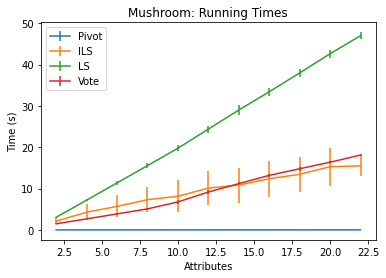

In [30]:
"""
Time Plots
"""

attributes = [x for x in range(2, 23, 2)]

### PIVOT ###

scores1 = [[0.017,0.006,0.004,0.003,0.003,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001],
           [0.002,0.004,0.002,0.003,0.003,0.002,0.002,0.001,0.002,0.003,0.001,0.003,0.002,0.003,0.002,0.003,0.001,0.002,0.003,0.003,0.002,0.001,0.002,0.002,0.002,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.001,0.003,0.002,0.002,0.002,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.002,0.004,0.002,0.002],
           [0.004,0.002,0.004,0.004,0.004,0.003,0.003,0.003,0.003,0.004,0.003,0.004,0.006,0.004,0.002,0.004,0.005,0.004,0.003,0.003,0.004,0.004,0.002,0.003,0.005,0.003,0.004,0.002,0.004,0.003,0.004,0.005,0.003,0.002,0.002,0.004,0.004,0.003,0.004,0.003,0.003,0.002,0.003,0.004,0.005,0.003,0.004,0.004,0.003,0.004],
           [0.003,0.004,0.004,0.005,0.005,0.005,0.004,0.004,0.005,0.003,0.004,0.004,0.005,0.004,0.003,0.004,0.003,0.004,0.005,0.004,0.005,0.005,0.004,0.005,0.004,0.004,0.004,0.004,0.007,0.006,0.007,0.004,0.005,0.008,0.004,0.006,0.004,0.004,0.004,0.005,0.004,0.004,0.005,0.003,0.004,0.004,0.004,0.004,0.004,0.004],
           [0.005,0.005,0.01,0.007,0.008,0.005,0.004,0.007,0.006,0.004,0.009,0.005,0.007,0.006,0.006,0.005,0.005,0.006,0.006,0.006,0.006,0.006,0.005,0.004,0.008,0.005,0.006,0.005,0.005,0.008,0.005,0.005,0.005,0.007,0.007,0.005,0.008,0.006,0.006,0.004,0.007,0.005,0.004,0.008,0.005,0.006,0.007,0.007,0.007,0.006],
           [0.008,0.006,0.006,0.005,0.007,0.007,0.005,0.008,0.008,0.009,0.005,0.007,0.009,0.006,0.008,0.005,0.007,0.008,0.007,0.006,0.006,0.008,0.009,0.007,0.005,0.007,0.009,0.007,0.007,0.007,0.007,0.008,0.007,0.008,0.005,0.006,0.009,0.006,0.009,0.006,0.007,0.006,0.009,0.007,0.007,0.009,0.007,0.007,0.006,0.007],
           [0.008,0.01,0.01,0.01,0.007,0.008,0.006,0.009,0.013,0.008,0.012,0.008,0.009,0.008,0.01,0.008,0.007,0.008,0.009,0.01,0.007,0.008,0.007,0.007,0.007,0.008,0.007,0.009,0.01,0.01,0.01,0.007,0.007,0.009,0.01,0.008,0.009,0.008,0.006,0.006,0.008,0.008,0.009,0.01,0.008,0.008,0.007,0.01,0.008,0.008],
           [0.011,0.01,0.008,0.009,0.01,0.011,0.008,0.009,0.008,0.007,0.009,0.011,0.01,0.009,0.01,0.009,0.011,0.007,0.008,0.01,0.008,0.009,0.011,0.009,0.012,0.008,0.01,0.01,0.009,0.009,0.007,0.011,0.009,0.009,0.01,0.01,0.009,0.011,0.011,0.009,0.009,0.012,0.01,0.009,0.011,0.009,0.009,0.007,0.011,0.007],
           [0.011,0.01,0.011,0.01,0.01,0.01,0.012,0.012,0.01,0.01,0.011,0.012,0.011,0.012,0.011,0.01,0.009,0.011,0.01,0.01,0.01,0.008,0.011,0.011,0.012,0.009,0.011,0.008,0.011,0.009,0.009,0.01,0.014,0.011,0.01,0.011,0.011,0.008,0.008,0.012,0.01,0.012,0.011,0.011,0.009,0.009,0.01,0.013,0.014,0.015],
           [0.01,0.011,0.013,0.015,0.011,0.013,0.01,0.01,0.009,0.012,0.013,0.01,0.009,0.009,0.009,0.013,0.013,0.01,0.012,0.013,0.015,0.012,0.012,0.011,0.009,0.012,0.012,0.013,0.01,0.01,0.014,0.01,0.01,0.012,0.013,0.016,0.01,0.014,0.012,0.012,0.013,0.014,0.013,0.011,0.011,0.011,0.013,0.01,0.009,0.014],
           [0.013,0.013,0.013,0.014,0.014,0.014,0.011,0.014,0.013,0.012,0.013,0.011,0.014,0.012,0.014,0.014,0.011,0.013,0.012,0.011,0.013,0.013,0.011,0.011,0.012,0.012,0.015,0.012,0.016,0.013,0.013,0.013,0.015,0.014,0.012,0.012,0.018,0.01,0.013,0.013,0.013,0.016,0.012,0.012,0.013,0.009,0.012,0.016,0.015,0.011]]

### ILS ###

h_scores1 = [[1.46,3.078,3.081,1.214,3.017,2.974,1.445,3.05,0.924,1.253,1.225,1.451,1.448,1.366,1.462,2.299,1.732,1.161,2.994,2.948,1.496,0.908,1.834,1.861,0.888,2.892,3.066,2.967,0.966,2.942,2.596,3.011,3.057,2.13,2.923,2.979,2.302,3.02,1.564,1.405,2.949,1.998,1.963,1.554,2.29,1.394,3.05,2.911,1.476,1.723],
             [4.151,1.189,5.308,2.811,5.381,3.749,7.531,7.082,7.379,2.939,6.944,1.347,3.525,2.104,5.092,1.494,6.072,4.556,1.67,1.243,3.694,4.091,3.58,3.639,6.895,6.462,2.458,5.859,7.157,4.84,4.435,3.039,5.213,1.819,7.359,2.925,3.733,5.249,7.268,3.955,1.872,4.95,1.148,6.778,3.586,3.848,4.178,1.391,7.154,3.866],
             [5.127,8.732,5.174,4.605,2.596,4.646,5.031,9.403,5.343,4.068,4.163,4.776,1.782,7.054,11.646,3.509,4.428,4.636,10.762,3.522,2.954,2.403,11.795,5.832,4.057,6.62,5.872,9.807,4.43,6.047,4.59,2.178,5.056,8.636,8.407,3.108,5.93,4.163,9.24,11.658,6.091,10.723,3.377,3.064,2.429,4.957,4.412,5.777,6.375,3.678],
             [8.355,7.469,4.163,4.661,3.994,4.295,8.744,9.008,13.392,13.141,5.243,5.394,4.861,8.419,7.638,7.449,13.711,4.853,3.531,9.002,6.714,6.586,15.542,6.874,7.999,8.772,10.498,9.447,2.731,3.241,2.371,7.567,6.402,4.955,12.011,3.489,5.8,9.46,8.331,7.472,8.705,6.641,4.986,12.637,10.057,6.394,5.054,6.363,5.055,5.703],
             [11.151,14.984,4.11,5.28,3.103,4.944,16.139,4.109,12.083,20.439,3.693,9.196,6.115,10.225,6.306,5.404,11.701,8.542,9.851,6.118,7.282,6.332,5.581,13.167,4.775,15.314,11.414,7.729,10.914,4.424,6.476,7.249,11.397,4.173,4.427,8.417,4.296,8.439,6.812,11.38,7.318,6.531,9.507,4.313,17.191,8.43,5.469,3.734,5.035,5.859],
             [5.664,12.931,12.386,20.648,8.371,10.391,16.704,11.78,7.569,9.634,12.811,7.101,5.011,16.39,7.747,10.975,7.581,6.189,6.131,16.057,13.86,11.207,5.106,10.103,20.764,10.485,6.437,9.113,6.658,8.04,11.027,6.537,10.838,5.526,19.864,15.459,6.612,14.362,5.714,11.699,11.504,9.57,5.848,7.587,7.714,6.342,6.812,7.356,11.676,9.742],
             [10.372,7.77,5.415,11.12,9.995,11.892,24.678,6.189,3.933,9.472,6.409,10.288,8.478,9.427,8.314,9.75,9.853,16.397,10.135,11.389,15.225,6.854,8.948,12.685,13.337,13.971,19.631,8.68,6.407,7.216,7.518,15.939,16.733,11.601,11.507,9.453,6.234,10.132,21.644,16.646,9.64,9.826,9.434,6.792,18.17,9.571,13.165,9.32,8.554,5.959],
             [11.896,8.87,9.577,15.926,7.496,9.505,15.256,10.636,19.278,24.588,9.595,9.33,8.611,13.101,6.056,14.72,9.375,20.469,13.198,10.375,16.531,20.312,8.262,11.362,7.903,10.788,12.603,8.226,9.435,11.243,14.833,7.456,18.708,12.76,12.064,19.09,16.417,7.147,9.456,11.832,16.707,11.167,9.914,11.0,8.339,13.47,10.427,13.639,5.989,23.6],
             [17.176,12.179,11.332,15.275,14.74,9.78,10.437,9.589,10.538,11.515,9.562,10.026,14.01,7.91,11.032,13.588,18.626,10.332,19.817,20.475,12.285,20.745,14.789,11.142,9.028,13.08,14.975,16.632,9.283,22.117,15.881,20.821,10.571,12.088,12.049,9.709,7.53,21.768,12.951,16.279,16.137,7.262,16.07,11.495,22.202,14.959,17.161,9.396,7.926,8.447],
             [19.367,13.83,11.096,12.481,22.387,12.674,23.888,18.937,23.656,19.105,8.92,18.668,20.134,15.368,19.968,10.077,10.468,13.696,18.937,10.189,8.799,9.757,13.642,12.618,23.148,10.812,13.121,9.285,15.583,14.331,9.8,26.024,22.763,19.795,14.269,11.114,17.233,11.608,19.239,14.889,11.082,13.659,11.469,14.5,17.469,12.258,14.444,16.585,20.596,10.411],
             [17.513,16.642,11.125,15.888,12.925,13.129,14.508,17.032,16.472,13.604,16.146,18.087,18.268,14.867,13.205,16.288,16.562,16.031,17.055,18.984,16.262,15.351,16.928,16.53,13.448,18.917,11.441,17.434,13.599,12.08,14.318,14.057,13.798,12.858,16.129,16.525,16.835,23.147,16.533,10.928,15.198,12.316,15.183,15.363,15.39,22.711,14.212,13.254,14.559,14.973]]

# Add in Pivot Times
h_scores1 = [[h_scores1[i][j] + scores1[i][j] for j in range(len(h_scores1[i]))] for i in range(len(h_scores1))]

### LOCAL ###

h_scores2 = [[3.356,3.013,2.983,3.165,3.036,3.03,3.168,2.989,3.112,3.027,3.032,3.122,3.104,3.073,3.028,3.05,3.059,3.185,3.099,3.111,3.096,3.108,3.075,3.035,3.077,2.957,3.094,2.832,2.955,3.005,3.099,2.951,2.916,2.952,3.006,3.095,3.01,2.941,2.928,3.006,3.039,3.12,3.171,3.089,3.174,3.063,2.983,3.017,3.116,3.072],
             [7.013,7.204,7.176,7.104,7.472,7.695,7.449,7.236,7.381,7.05,7.183,7.332,7.157,6.827,7.404,7.353,7.45,6.876,7.115,6.39,6.9,7.375,6.987,7.015,7.225,7.27,6.917,6.81,7.701,7.397,7.11,6.923,7.095,6.919,7.436,7.198,7.471,7.128,7.349,7.378,6.706,7.149,6.846,8.008,7.639,7.387,6.929,7.219,7.182,7.295],
             [10.757,10.911,11.439,12.176,11.238,11.153,10.931,11.586,11.301,11.497,11.36,12.462,10.866,11.529,11.438,10.635,11.272,11.334,11.578,10.762,11.099,10.104,11.768,10.837,11.255,11.862,12.091,11.519,11.522,11.492,11.314,10.666,11.155,11.227,12.131,11.266,11.688,11.69,12.356,12.31,11.812,11.961,11.216,11.26,10.912,10.95,10.864,11.612,11.543,11.157],
             [15.658,15.282,15.225,15.949,14.517,14.026,16.404,15.597,16.009,15.701,14.938,15.432,15.061,15.199,15.433,16.379,16.571,14.213,14.998,15.322,15.077,15.91,16.914,15.293,16.254,15.601,15.771,14.968,15.662,15.191,15.168,15.923,15.583,15.658,15.968,15.134,14.906,16.935,15.709,16.183,16.019,15.78,14.506,16.629,15.269,14.544,14.987,16.333,16.238,15.128],
             [21.039,21.167,19.792,19.709,18.776,18.684,21.496,18.82,20.144,21.378,19.015,20.454,21.005,20.599,19.638,18.933,19.335,19.647,20.131,18.922,19.153,19.824,18.956,20.31,18.752,19.529,21.383,19.411,20.493,19.333,19.091,19.82,19.605,19.395,18.787,19.826,19.202,19.683,19.514,19.09,20.057,19.598,20.64,18.856,20.571,20.717,19.81,19.298,19.352,19.26],
             [24.518,24.858,23.779,25.583,24.161,25.005,24.54,24.155,24.48,23.876,25.452,24.694,23.566,25.214,24.032,24.713,22.971,23.029,24.565,26.014,24.981,25.804,23.427,24.076,24.765,24.077,23.594,24.892,24.924,24.351,24.919,23.446,24.275,23.238,25.644,25.991,22.794,25.28,23.23,25.531,24.642,24.096,22.841,23.459,23.827,23.809,23.906,24.921,24.785,24.813],
             [29.502,29.048,28.428,29.731,27.886,28.946,31.512,27.959,26.88,28.226,28.161,29.992,28.221,28.753,30.219,30.675,28.289,31.446,28.436,28.618,29.76,27.745,27.894,28.218,28.833,29.975,30.347,28.344,28.657,28.647,27.828,29.239,29.968,29.229,30.332,27.565,26.562,30.628,31.087,29.196,29.423,29.111,27.793,29.925,30.306,29.136,28.742,27.71,28.924,27.579],
             [33.763,33.116,33.367,34.726,32.493,33.516,33.984,33.027,33.611,33.704,34.179,32.836,31.996,32.6,31.771,35.67,33.655,35.013,32.454,32.829,34.416,34.044,32.69,33.851,32.805,33.012,33.113,31.768,33.152,33.752,33.254,33.47,33.864,33.837,33.545,34.286,33.189,31.631,32.416,32.444,33.98,32.903,33.606,33.968,34.745,35.434,33.859,33.125,32.017,34.534],
             [39.487,38.52,37.657,37.663,38.864,39.03,37.032,37.482,36.202,38.24,37.855,36.996,39.145,37.171,37.46,37.492,39.118,37.448,38.922,38.969,38.325,39.715,38.442,36.224,37.418,37.61,37.832,39.354,37.762,40.516,37.383,38.959,37.107,37.573,37.182,37.254,36.449,39.286,37.717,36.807,38.661,37.421,37.692,38.164,38.576,38.126,37.661,37.732,36.888,38.375],
             [42.791,43.685,43.187,41.884,44.219,42.554,43.647,42.562,44.037,42.878,41.229,42.456,44.109,42.025,42.871,42.607,42.822,41.694,43.31,41.589,41.641,40.519,41.957,41.457,43.335,42.05,41.673,41.444,43.324,41.575,42.607,43.852,42.948,44.059,44.031,41.857,42.186,42.2,41.991,41.866,43.9,42.737,41.475,41.814,41.939,44.114,41.887,42.464,43.796,44.337],
             [46.836,48.312,46.715,46.524,45.669,47.199,46.228,46.126,45.8,45.762,46.257,48.625,47.696,47.05,46.726,47.066,46.066,48.565,47.266,45.809,46.598,45.852,46.56,45.05,48.036,46.913,47.937,47.228,47.988,48.234,47.582,45.226,47.319,46.198,46.696,47.251,46.786,46.517,47.841,46.982,47.461,47.668,47.963,47.272,46.987,47.436,47.974,47.159,47.35,46.787]]

# Add in Pivot Times
h_scores2 = [[h_scores2[i][j] + scores1[i][j] for j in range(len(h_scores2[i]))] for i in range(len(h_scores2))]

### VOTE ###

l_scores1 = [[1.568,1.449,1.422,1.442,1.443,1.481,1.488,1.502,1.48,1.421,1.503,1.43,1.459,1.487,1.442,1.453,1.454,1.526,1.497,1.462,1.517,1.544,1.468,1.456,1.447,1.443,1.496,1.474,1.487,1.477,1.458,1.468,1.464,1.486,1.509,1.523,1.521,1.42,1.44,1.417,1.431,1.436,1.426,1.468,1.468,1.446,1.447,1.508,1.488,1.534],
             [2.616,3.116,2.693,2.757,2.775,2.674,2.541,2.579,2.604,2.614,2.5,2.828,2.643,2.692,2.601,2.809,2.568,2.618,2.832,2.815,2.607,2.675,2.744,2.65,2.496,2.535,2.684,2.601,2.58,2.62,2.737,2.637,2.557,2.73,2.546,2.636,2.64,2.628,2.487,2.779,2.837,2.63,2.585,2.742,2.923,2.775,2.618,2.807,2.456,2.554],
             [3.841,3.692,3.94,4.033,4.002,4.052,3.897,3.732,3.975,3.981,3.806,4.12,4.136,3.94,3.536,4.042,3.911,4.223,3.771,3.897,3.897,3.835,3.609,3.665,3.835,3.721,3.782,3.636,4.058,3.775,4.012,4.035,3.922,3.791,3.573,3.983,3.724,4.144,3.94,3.617,3.762,3.77,3.938,3.911,3.779,3.855,3.909,3.928,3.837,3.868],
             [4.919,5.157,5.261,5.384,5.041,5.103,4.957,5.073,4.763,4.574,4.889,5.171,5.438,4.904,4.824,5.09,4.945,5.076,5.412,5.025,4.979,5.153,4.647,5.142,5.341,5.006,4.771,4.686,5.808,5.432,5.33,5.14,5.345,5.435,4.608,5.3,5.209,5.048,5.172,5.168,5.311,4.946,4.877,4.85,4.756,4.946,5.426,5.302,5.178,5.008],
             [6.007,7.199,7.483,6.798,7.341,6.576,6.819,6.872,7.009,5.741,6.595,7.276,6.897,7.416,6.64,6.856,6.411,6.864,6.666,6.946,6.932,6.959,7.479,7.128,6.542,5.958,6.244,6.601,6.425,6.963,6.787,6.71,5.939,7.646,6.463,6.601,6.953,6.863,6.81,6.308,6.453,6.253,6.689,6.749,5.908,6.323,7.0,7.248,7.457,7.618],
             [9.171,8.907,8.457,9.095,9.463,9.038,8.748,8.643,10.045,8.786,9.294,9.787,8.475,8.819,9.17,8.812,8.61,9.189,9.612,9.618,8.966,9.554,9.73,9.048,8.004,8.758,9.743,9.46,9.136,9.413,9.203,9.467,8.541,9.496,8.458,9.544,8.593,9.296,8.998,9.233,8.811,9.049,9.311,9.545,9.04,10.258,9.407,9.89,9.299,9.061],
             [11.596,11.996,11.507,11.128,10.715,10.457,10.521,11.18,11.244,11.382,10.994,10.898,10.83,11.624,12.175,11.263,11.195,11.99,11.273,10.843,11.407,11.117,11.161,11.072,11.041,11.01,10.874,12.095,11.556,11.656,10.678,10.869,11.01,11.521,11.51,10.547,10.892,11.151,11.067,10.465,11.506,11.381,10.835,11.536,10.997,11.655,10.619,11.318,11.157,11.476],
             [12.662,13.42,13.218,12.781,13.957,13.823,12.663,13.54,12.562,13.39,12.896,12.192,12.86,12.08,13.515,13.196,13.49,12.607,12.975,13.997,12.879,13.242,13.24,13.356,13.463,13.074,13.167,13.52,13.256,13.221,13.343,13.68,13.498,13.244,13.397,13.155,13.104,13.093,12.874,14.036,13.366,13.814,13.236,12.707,13.848,13.275,12.382,13.203,13.048,13.215],
             [15.408,14.851,15.055,14.822,15.033,15.003,15.652,14.716,14.935,14.984,14.78,15.169,14.146,14.761,14.412,13.714,14.824,14.866,14.169,14.718,14.907,14.204,14.452,15.487,15.247,14.898,15.179,14.679,15.059,14.451,14.813,15.175,15.227,14.919,14.296,14.308,15.451,14.695,14.692,15.012,14.788,15.445,14.643,14.151,14.021,14.146,13.819,14.913,15.588,15.356],
             [16.008,16.857,16.708,15.777,16.418,16.987,16.855,16.269,16.627,15.68,16.482,16.216,16.563,16.175,16.392,16.583,16.491,16.349,16.49,16.55,16.409,16.667,16.278,16.068,16.274,16.082,16.29,16.376,15.679,17.031,16.438,16.261,16.012,16.616,16.586,16.567,16.212,16.329,16.753,16.034,16.558,16.544,16.003,16.118,16.522,16.249,16.011,16.315,16.331,16.686],
             [18.3,18.171,18.118,18.22,18.081,17.617,18.349,17.898,17.601,17.861,17.983,18.515,18.022,18.19,17.87,17.767,18.085,17.958,18.25,18.02,17.416,17.508,18.291,18.059,18.412,18.215,17.879,18.223,18.154,18.452,17.466,18.281,18.515,17.977,18.312,18.391,17.911,18.592,18.285,18.039,18.462,18.059,18.21,18.584,17.894,18.375,18.104,18.486,18.43,18.24]]

scores = [scores1[i] for i in range(len(attributes))]
plot_scores = [round(np.mean(s), 5) for s in scores]
err_scores = [np.std(s) for s in scores]

# print("Pivot multiple increase of cost for smallest sample:", plot_scores[0] / plot_scores[-1])

h_scores = [h_scores1[i] for i in range(len(attributes))]
h_plot_scores = [round(np.mean(s), 5) for s in h_scores]
h_err_scores = [np.std(s) for s in h_scores]

h1_scores = [h_scores2[i] for i in range(len(attributes))]
h1_plot_scores = [round(np.mean(s), 5) for s in h1_scores]
h1_err_scores = [np.std(s) for s in h1_scores]

l_scores = [l_scores1[i] for i in range(len(attributes))]
l_plot_scores = [round(np.mean(s), 5) for s in l_scores]
l_err_scores = [np.std(s) for s in l_scores]

# print("LS relative decrease from ILS at R = 22:", 100 * (h1_plot_scores[-1] - l_plot_scores[-1] ) / h1_plot_scores[-1])

print(plot_scores)
print(h_plot_scores)
print(h1_plot_scores)
print(l_plot_scores)

plt.title("Mushroom: Running Times")
plt.xlabel("Attributes")
plt.ylabel("Time (s)")
plt.errorbar(attributes, plot_scores, err_scores, label="Pivot")
plt.errorbar(attributes, h_plot_scores, h_err_scores, label="ILS")
plt.errorbar(attributes, h1_plot_scores, h1_err_scores, label="LS")
plt.errorbar(attributes, l_plot_scores, l_err_scores, label="Vote")
plt.legend()
plt.show()
